In [1]:
import torch

from span_clf import Corpus, read_json_gz_lines

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

In [4]:
model = torch.load('data/model3.p', map_location='cpu')

/Users/dclure/.local/share/virtualenvs/headline-parser-OTq2To-B/lib/python3.7/site-packages/torch/serialization.py:400: UserWarning: Couldn't retrieve source code for container of type Classifier. It won't be checked for correctness upon loading.
  "type " + container_type.__name__ + ". It won't be checked "
/Users/dclure/.local/share/virtualenvs/headline-parser-OTq2To-B/lib/python3.7/site-packages/torch/serialization.py:400: UserWarning: Couldn't retrieve source code for container of type CharEmbedding. It won't be checked for correctness upon loading.
  "type " + container_type.__name__ + ". It won't be checked "
/Users/dclure/.local/share/virtualenvs/headline-parser-OTq2To-B/lib/python3.7/site-packages/torch/serialization.py:400: UserWarning: Couldn't retrieve source code for container of type SpanEncoder. It won't be checked for correctness upon loading.
  "type " + container_type.__name__ + ". It won't be checked "


In [13]:
corpus = Corpus.load('data/corpus.p')

In [11]:
model(['The "Fill Up Your Shelves" Project']).argmax()

tensor(13)

In [12]:
model.labels[model(['The Fill Up Your Shelves Project']).argmax()]

'npr.org'

In [12]:
weights = []
for span, domain in islice(corpus.train, 10000):
    
    yp = model([span]).exp()
    pred = model.labels[yp.argmax().item()]
    weight = yp.max().item()
    
    if weight > 0.8:
        print(span, domain, pred, weight)
        
    weights.append(weight)

breitbart breitbart.com breitbart.com 0.999908447265625
dailycaller dailycaller.com dailycaller.com 0.9999752044677734
d dailykos.com dailykos.com 0.8932421207427979
cnn video cnn.com cnn.com 0.9998912811279297
ap news apnews.com apnews.com 0.9949507117271423
dailycaller dailycaller.com dailycaller.com 0.9999752044677734
what your ceo is reading wsj.com wsj.com 0.9456831812858582
rep heck msnbc.com msnbc.com 0.8480453491210938
dailycaller dailycaller.com dailycaller.com 0.9999752044677734
dailycaller dailycaller.com dailycaller.com 0.9999752044677734
real time economics wsj.com wsj.com 0.9993583559989929
neko case   hell on  npr.org npr.org 0.8168472647666931
cnn video cnn.com cnn.com 0.9998912811279297
# tweets for anyone who needs # buzzfeed.com buzzfeed.com 0.895000159740448
listen now npr.org npr.org 0.9999103546142578
cnn video cnn.com cnn.com 0.9998912811279297
 the world is sound  review wsj.com wsj.com 0.9982886910438538
breitbart breitbart.com breitbart.com 0.999908447265625
l

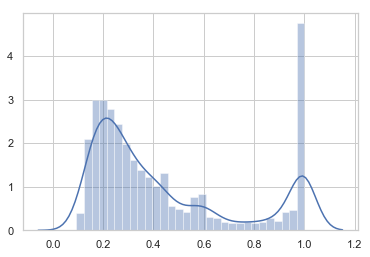

In [10]:
sns.distplot(weights, 30)

In [15]:
corpus.groups['bloomberg.com'][:10]

['putin is a',
 'competitor   not a foe  trump says ahead of summit',
 'brexit threatens equal pay protections  uk women s groups fear',
 'bloomberg lp diversity and inclusion',
 'small hedge funds seen quickest to drop research under mifid',
 'bloomberg professional services',
 'rep tim ryan',
 'inaugural address had  positive message ',
 'the daily prophet',
 'this rally in stocks has to end  right ']

In [1]:
from headline_parser import nlp, standardize_text

In [2]:
for row in read_json_gz_lines('data/cleaning-titles.json/'):
    if 'only an actual millennial can get' in row['title'].lower():
        print(row)

NameError: name 'read_json_gz_lines' is not defined

In [11]:
doc = nlp(standardize_text("Buzzfeed --- Only An Actual Millennial Can Get 100% On This Internet Acronym Quiz"))

In [12]:
[s._.clf_text for s in doc._.spans if s._.clf_text]

['buzzfeed',
 'only an actual millennial can get # % on this internet acronym quiz']